IMPORTING LIBRARIES

In [148]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose




In [149]:
df=pd.read_csv('Unemployment in India.csv',parse_dates=[' Date'],index_col=' Date',dayfirst=True)
print(df.isnull().sum())
df.ffill(inplace=True)
print(df.dtypes)
df.head(5)

Region                                      28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Region                                       object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object


,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Date,,,,,,
2019-05-31,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural
2019-06-30,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural
2019-07-31,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural
2019-08-31,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural
2019-09-30,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural


In [150]:
print(df.describe(include='all'))


             Region  Frequency   Estimated Unemployment Rate (%)  \
count           768        768                        768.000000   
unique           28          2                               NaN   
top     West Bengal    Monthly                               NaN   
freq             56        395                               NaN   
mean            NaN        NaN                         11.627969   
std             NaN        NaN                         10.566371   
min             NaN        NaN                          0.000000   
25%             NaN        NaN                          4.720000   
50%             NaN        NaN                          8.350000   
75%             NaN        NaN                         15.472500   
max             NaN        NaN                         76.740000   

         Estimated Employed   Estimated Labour Participation Rate (%)   Area  
count          7.680000e+02                                768.000000    768  
unique                  N

TIME SERIES PLOT

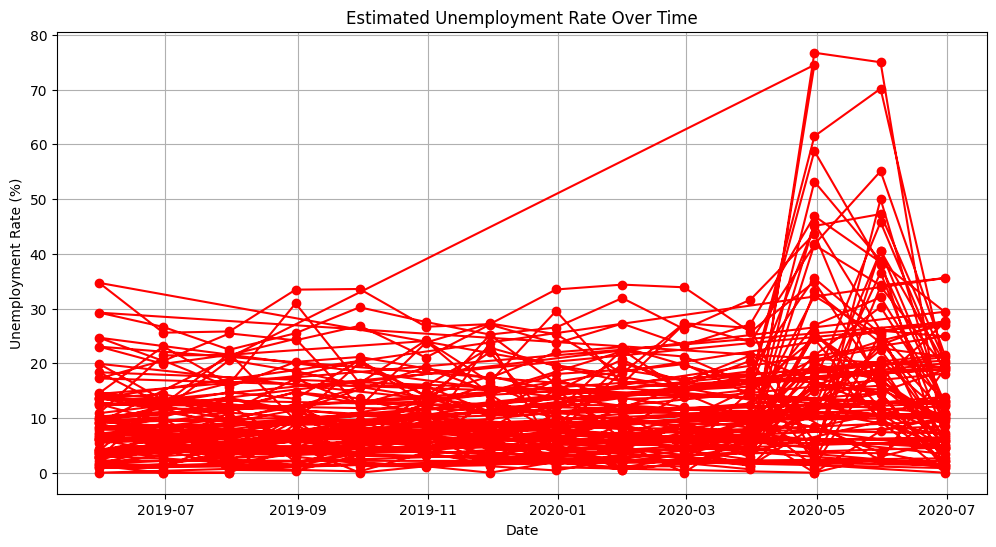

In [151]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df[' Estimated Unemployment Rate (%)'], marker='o',linestyle='-',color='red')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


HISTOGRAM

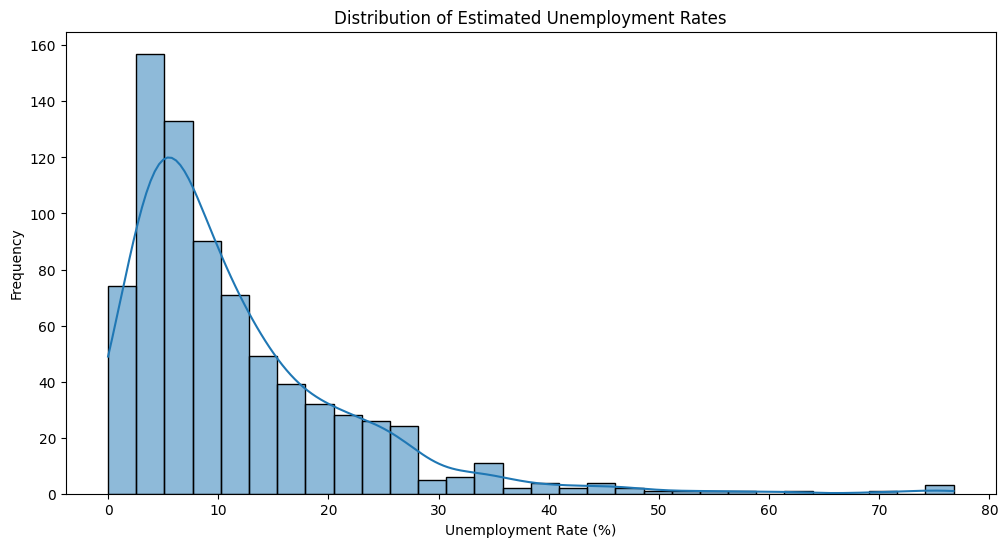

In [152]:
plt.figure(figsize=(12,6))
sns.histplot(df[' Estimated Unemployment Rate (%)'],bins=30,kde=True)
plt.title('Distribution of Estimated Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

TREND ANALYSIS


```



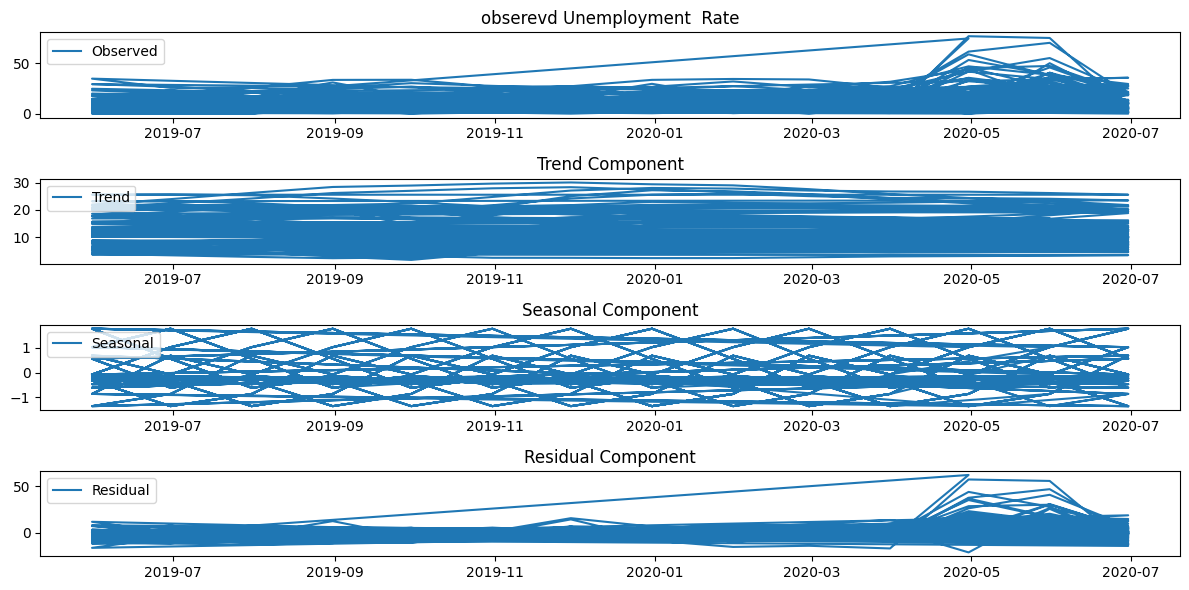

In [153]:
period=12
result = seasonal_decompose(df[' Estimated Unemployment Rate (%)'], model='additive',period=period)
plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
plt.plot(result.observed,label='Observed')
plt.title('obserevd Unemployment  Rate')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(result.seasonal,label='Seasonal')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(result.resid,label='Residual')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



